# Surprise homework

Популярным способом вычисления ошибки в наборе регрессионных прогнозов является использование среднеквадратичной ошибки.

Сокращенный как RMSE, метрика иногда называется Mean Squared Error или MSE, отбрасывая корневую часть из расчета и имени.

RMSE рассчитывается как квадратный корень из среднего квадрата разностей между фактическими результатами и прогнозами.

Будем оценивать по метрике RMSE показатели алгоритмов при помощи функции перекрестной проверки cross_validate

cross_validate( оценка , X , y = None , * , groups = None , scoring = None , cv = None , n_jobs = None , verbose = 0 , fit_params = None , pre_dispatch = '2 * n_jobs' , return_train_score = False , return_estimator = False , error_score = nan )

оценка - бъект, который нужно использовать для соответствия данным, наши алгоритмы.

X в виде массива (n_samples, n_features)
Данные подходят. Это может быть, например, список или массив. Data

y, подобный массиву формы (n_samples,) или (n_samples, n_outputs), по умолчанию = None
Целевая переменная, которую нужно попытаться предсказать в случае обучения с учителем.

cv int, генератор перекрестной проверки или итерация, по умолчанию = None
Определяет стратегию разделения перекрестной проверки. Возможные исходные данные для cv:

n_jobs int, по умолчанию = None
Количество заданий для параллельного выполнения. 

verbose int, по умолчанию = 0
Уровень многословности.

Полезная ссылка: https://www.machinelearningmastery.ru/profiling-matrix-factorization-and-recommendation-engines-with-python-330c0f35e274/

In [17]:
import io 
import os
import pandas as pd
from collections import defaultdict



### Functions

In [24]:
from surprise import Dataset, accuracy
""" accuracy - предоставляет инструменты для вычисления 
показателей точности по набору прогнозов"""
from surprise.model_selection import cross_validate, KFold, train_test_split
# KFold - a basic cross-validation iterator.
#train_test_split - split a dataset into trainset and testset.


### Load data

In [19]:
data = Dataset.load_builtin('ml-100k')
data

In [20]:
trainset, testset = train_test_split(data, test_size=.25)
trainset

### Define algorithms

In [34]:
from surprise import SVD, KNNWithMeans, NormalPredictor

In [35]:
k = 30

## Прогнозирование случайного рейтинга на основе распределения всех рейтингов в наборе

In [41]:
alg1 = NormalPredictor()
cross_validate(alg1, data, measures=['RMSE'], cv=5, verbose=True)

Evaluating RMSE of algorithm NormalPredictor on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.5166  1.5191  1.5113  1.5272  1.5176  1.5184  0.0052  
Fit time          0.14    0.15    0.16    0.15    0.15    0.15    0.01    
Test time         0.18    0.23    0.24    0.17    0.23    0.21    0.03    


{'test_rmse': array([1.51663223, 1.51909268, 1.51125645, 1.52724655, 1.51761625]),
 'fit_time': (0.1390080451965332,
  0.1520087718963623,
  0.15700888633728027,
  0.14700841903686523,
  0.14700818061828613),
 'test_time': (0.18001008033752441,
  0.23401331901550293,
  0.2410140037536621,
  0.17000961303710938,
  0.23101305961608887)}

## user-based коллаборативная фильтрация, метод kNN, k = 30, метрика косинуса

user-based коллаборативная фильтрация - это метод, используемый для прогнозирования элементов, которые могут понравиться пользователю, на основе оценок, присвоенных этому элементу другими пользователями, имеющими схожие вкусы с целевым пользователем.

In [42]:
alg2 = KNNWithMeans(k, sim_options={'name': 'cosine'})
cross_validate(alg2, data, measures=['RMSE'], cv=5, verbose=True)

Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Evaluating RMSE of algorithm KNNWithMeans on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9635  0.9600  0.9577  0.9562  0.9542  0.9583  0.0032  
Fit time          2.00    2.04    2.00    2.05    2.04    2.03    0.02    
Test time         3.89    3.81    3.94    3.95    3.81    3.88    0.06    


{'test_rmse': array([0.96351693, 0.95997552, 0.95772462, 0.95617445, 0.95416366]),
 'fit_time': (2.004114866256714,
  2.040116786956787,
  1.9961140155792236,
  2.053117275238037,
  2.040116310119629),
 'test_time': (3.8872222900390625,
  3.81021785736084,
  3.941225528717041,
  3.95422625541687,
  3.810218095779419)}

## user-based коллаборативная фильтрация, метод kNN, k = 30, метрика Mean Squared Difference

In [43]:
alg3 = KNNWithMeans(k, sim_options={'name': 'msd'})
cross_validate(alg3, data, measures=['RMSE'], cv=5, verbose=True)

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE of algorithm KNNWithMeans on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9528  0.9571  0.9594  0.9492  0.9437  0.9524  0.0056  
Fit time          0.61    0.59    0.60    0.59    0.59    0.60    0.01    
Test time         3.89    3.96    3.90    3.82    3.91    3.90    0.05    


{'test_rmse': array([0.95284924, 0.95708362, 0.95937752, 0.94921186, 0.94366983]),
 'fit_time': (0.6050348281860352,
  0.5860335826873779,
  0.6020345687866211,
  0.59403395652771,
  0.5890336036682129),
 'test_time': (3.8852221965789795,
  3.960226535797119,
  3.9032232761383057,
  3.818218469619751,
  3.9102234840393066)}

## user-based коллаборативная фильтрация, метод kNN, k = 30, метрика корреляция Пирсона

In [44]:
alg4 = KNNWithMeans(k, sim_options={'name': 'pearson'})
cross_validate(alg4, data, measures=['RMSE'], cv=5, verbose=True)

Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Evaluating RMSE of algorithm KNNWithMeans on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9559  0.9500  0.9451  0.9583  0.9522  0.9523  0.0046  
Fit time          2.67    2.66    2.63    2.68    2.68    2.66    0.02    
Test time         3.85    3.87    3.82    3.92    3.89    3.87    0.03    


{'test_rmse': array([0.95587211, 0.95002665, 0.94508658, 0.9582962 , 0.9521761 ]),
 'fit_time': (2.6701529026031494,
  2.658151865005493,
  2.632150411605835,
  2.6791529655456543,
  2.6841535568237305),
 'test_time': (3.85122013092041,
  3.8652210235595703,
  3.823218584060669,
  3.9162240028381348,
  3.8942224979400635)}

## SVD

SVD - сингулярное разложение матрицы  позволяет вычислять обратные и псевдообратные матрицы большого размера, что делает его полезным инструментом при решении задач регрессионного анализа.


In [45]:
alg5 = SVD()
cross_validate(SVD(), data, measures=['RMSE'], cv=5, verbose=True)

Evaluating RMSE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9356  0.9393  0.9396  0.9392  0.9293  0.9366  0.0039  
Fit time          5.81    5.82    5.82    5.73    5.74    5.78    0.04    
Test time         0.20    0.28    0.29    0.19    0.28    0.25    0.04    


{'test_rmse': array([0.93564093, 0.93933602, 0.93963872, 0.93924195, 0.92930208]),
 'fit_time': (5.8053319454193115,
  5.820333003997803,
  5.821332931518555,
  5.730327844619751,
  5.735327959060669),
 'test_time': (0.1980113983154297,
  0.2820160388946533,
  0.2850160598754883,
  0.19301080703735352,
  0.28401613235473633)}

### Select algorithm

Выбираем лучший алгорим по средним значениям RMSE - это алгоритм SVD

### Calculate precision@k and recall@k

Для лучшего алгоритма по метрике RMSE рассчитать метрики precision@k and
recall@k для k=5 и порога отсечения 3.52, усредненные по всем пользователям.

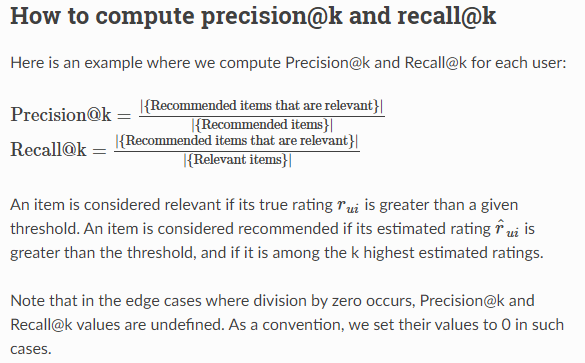

In [49]:
#FAQ
def precision_recall_at_k(predictions, k=10, threshold=3.5):
    """Возвращает точность и отзыв по k метрикам для каждого пользователя"""

    # Сначала сопоставляем прогнозы каждому пользователю.
    user_est_true = defaultdict(list)
    for uid, _, true_r, est, _ in predictions:
        user_est_true[uid].append((est, true_r))

    precisions = dict()
    recalls = dict()
    for uid, user_ratings in user_est_true.items():

        # Сортирую оценки пользователей по оценочной стоимости
        user_ratings.sort(key=lambda x: x[0], reverse=True)

        # Number of relevant items
        n_rel = sum((true_r >= threshold) for (_, true_r) in user_ratings)

        # Number of recommended items in top k
        n_rec_k = sum((est >= threshold) for (est, _) in user_ratings[:k])

        # Number of relevant and recommended items in top k
        n_rel_and_rec_k = sum(((true_r >= threshold) and (est >= threshold))
                              for (est, true_r) in user_ratings[:k])

        # Precision@K: Proportion of recommended items that are relevant
        # When n_rec_k is 0, Precision is undefined. We here set it to 0.

        precisions[uid] = n_rel_and_rec_k / n_rec_k if n_rec_k != 0 else 0

        # Recall@K: Proportion of relevant items that are recommended
        # When n_rel is 0, Recall is undefined. We here set it to 0.

        recalls[uid] = n_rel_and_rec_k / n_rel if n_rel != 0 else 0

    return precisions, recalls

algo = SVD()
kf = KFold(n_splits=5)

for trainset, testset in kf.split(data):
    algo.fit(trainset)
    predictions = algo.test(testset)
    precisions, recalls = precision_recall_at_k(predictions, k=5, threshold=3.52)
    
    # Precision and recall can then be averaged over all users
print(sum(prec for prec in precisions.values()) / len(precisions))
print(sum(rec for rec in recalls.values()) / len(recalls))

0.7249911629551092
0.4110620953141346


### Predict

Вот пример, в котором мы извлекаем топ-10 элементов с прогнозом наивысшего рейтинга для каждого пользователя в наборе данных MovieLens-100k. Сначала мы обучаем алгоритм SVD для всего набора данных, а затем прогнозируем все рейтинги для пар (пользователь, элемент), которых нет в обучающем наборе. Затем мы извлекаем прогноз из 10 лучших для каждого пользователя.

build_anti_testset - 
прогнозируйем рейтинги для всех пар (u, i), которые НЕ входят в обучающий набор.

In [50]:
# обратите внимание на функцию build_anti_testset 

from collections import defaultdict

from surprise import SVD
from surprise import Dataset


def get_top_n(predictions, n=10):
    """Return the top-N recommendation for each user from a set of predictions.

    Args:
        predictions(list of Prediction objects): The list of predictions, as
            returned by the test method of an algorithm.
        n(int): The number of recommendation to output for each user. Default
            is 10.

    Returns:
    A dict where keys are user (raw) ids and values are lists of tuples:
        [(raw item id, rating estimation), ...] of size n.
    """

    # First map the predictions to each user.
    top_n = defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
        top_n[uid].append((iid, est))

    # Then sort the predictions for each user and retrieve the k highest ones.
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]

    return top_n


# First train an SVD algorithm on the movielens dataset.
data = Dataset.load_builtin('ml-100k')
trainset = data.build_full_trainset()
algo = SVD()
algo.fit(trainset)

# Than predict ratings for all pairs (u, i) that are NOT in the training set.
testset = trainset.build_anti_testset()
predictions = algo.test(testset)

top_n = get_top_n(predictions, n=10)

# Print the recommended items for each user
for uid, user_ratings in top_n.items():
    print(uid, [iid for (iid, _) in user_ratings])

196 ['318', '64', '178', '408', '169', '50', '320', '48', '174', '134']
186 ['286', '22', '313', '483', '178', '408', '528', '498', '191', '488']
22 ['318', '136', '408', '64', '169', '483', '357', '480', '22', '427']
244 ['512', '285', '14', '124', '269', '272', '286', '647', '60', '474']
166 ['318', '174', '50', '963', '181', '210', '114', '172', '64', '190']
298 ['169', '408', '513', '316', '170', '963', '64', '136', '251', '124']
115 ['408', '514', '179', '285', '180', '169', '603', '134', '923', '156']
253 ['174', '408', '515', '313', '169', '114', '251', '172', '423', '478']
305 ['603', '515', '488', '150', '513', '647', '137', '524', '8', '498']
6 ['603', '657', '1021', '114', '705', '641', '57', '615', '647', '179']
62 ['408', '57', '657', '654', '603', '515', '478', '659', '427', '269']
286 ['178', '12', '603', '318', '98', '470', '64', '180', '59', '1019']
200 ['408', '64', '12', '114', '181', '963', '480', '302', '192', '165']
210 ['318', '427', '408', '169', '191', '12', '5

In [59]:
file = open("result2_2.txt", "w")
file.write('User 11' + "\n")
print('User 11' + "\n")
filePath = os.path.expanduser('~/.surprise_data/ml-100k/ml-100k/u.item')
filmsData = pd.read_csv(filePath, sep="|", encoding='ansi', usecols=[0,1,2], names=['id','name', 'date'])
for id, score in top_n['11']:
    name = filmsData.at[int(id) - 1, 'name'] 
    date = filmsData.at[int(id) - 1, 'date']
    print("    {:<6} ('{:<60}', '{:<11}') {:<10.3f}".format(id, name, date, score))
    file.write("    {:<6} ('{:<60}', '{:<11}') {:<10.3f}".format(id, name, date, score)+"\n")
file.close()

User 11

    50     ('Star Wars (1977)                                            ', '01-Jan-1977') 4.652     
    64     ('Shawshank Redemption, The (1994)                            ', '01-Jan-1994') 4.602     
    89     ('Blade Runner (1982)                                         ', '01-Jan-1982') 4.583     
    408    ('Close Shave, A (1995)                                       ', '28-Apr-1996') 4.521     
    483    ('Casablanca (1942)                                           ', '01-Jan-1942') 4.510     
    519    ('Treasure of the Sierra Madre, The (1948)                    ', '01-Jan-1948') 4.502     
    169    ('Wrong Trousers, The (1993)                                  ', '01-Jan-1993') 4.457     
    114    ('Wallace & Gromit: The Best of Aardman Animation (1996)      ', '05-Apr-1996') 4.452     
    199    ('Bridge on the River Kwai, The (1957)                        ', '01-Jan-1957') 4.442     
    302    ('L.A. Confidential (1997)                                    